<a href="https://colab.research.google.com/github/worldwidekatie/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
!pip install category_encoders
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
import pandas as pd
df_orig = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Build_Week_2/master/Final_IRA.csv')

df = df_orig[['content',	'region',	'language',	'publish_date',	'harvested_date',	
             'following',	'followers',	'updates',	'post_type',	'account_type',	
             'new_june_2018',	'retweet',	'account_category']]
df.head()

,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,#adee RT davis1988will: Congratulations for Ma...,United States,English,7/30/2017 21:18,7/30/2017 21:18,995,313,332,QUOTE_TWEET,Right,0,1,RightTroll
1,RT SSOL getting attention. It's penny play day...,United States,English,6/27/2015 21:47,6/27/2015 21:48,7,35,2213,NaN,Commercial,1,0,Commercial
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...,Unknown,English,8/17/2017 2:20,8/17/2017 2:21,36,6,793,NaN,Right,0,0,RightTroll
3,PROOF Melania Has Done FAR MORE for Disaster R...,Unknown,English,9/2/2017 3:09,9/2/2017 3:09,4984,925,3411,NaN,Right,0,0,RightTroll
4,"An USC professor, Raphael Bostic, named first ...",United States,English,3/15/2017 22:00,3/15/2017 22:00,14207,17561,3852,NaN,left,0,0,LeftTroll


Your code starts here:

In [42]:
train = df[(df['new_june_2018'] == 0)]
test = df[(df['new_june_2018'] == 1)]
print(train.shape, test.shape)

train, val = train_test_split(train, random_state=42)
print(train.shape, val.shape)

(9380, 13) (1266, 13)
(7035, 13) (2345, 13)


In [43]:
def wrangle(X):
  X['region'] = X['region'].replace({np.NaN: 'Unknown'})
  
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

target = 'retweet'
features = ['region',	'publish_date',	'harvested_date',	
             'following',	'followers',	'updates', 'account_type',	
            	'account_category']

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)
param_distributions = { 
    'randomforestclassifier__max_depth': [20,21,22,23,24,25,26,27,28,29,30], 
    'randomforestclassifier__min_samples_leaf': [10,11,12,13,14,15,16,17,18,19,20]
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.5s finished


In [45]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Validation Accuracy:", pipeline.score(X_val, y_val))

Best hyperparameters {'randomforestclassifier__min_samples_leaf': 12, 'randomforestclassifier__max_depth': 29}
Cross-validation Accuracy -0.9169864960909737
Train Accuracy: 0.9344705046197583
Validation Accuracy: 0.9168443496801706


In [46]:
print("Test Accuracy:", pipeline.score(X_test, y_test))

Test Accuracy: 0.5710900473933649


In [7]:
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
(tn, fp, fn, tp)

(1209, 127, 68, 941)

In [8]:
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8810861423220974


In [9]:
print("Recall:", tp/(tp+fn))

Recall: 0.9326065411298315


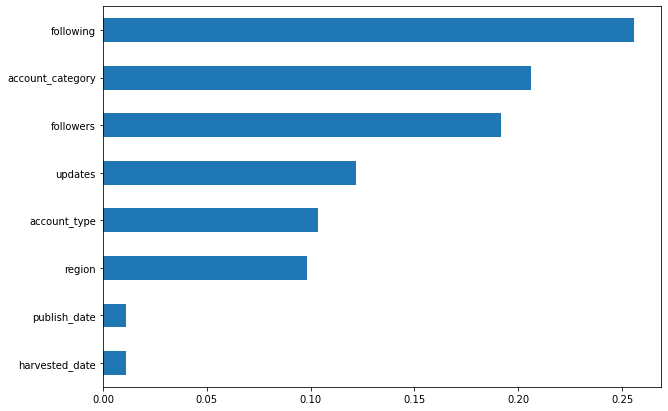

In [11]:
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,7))
importances.sort_values().plot.barh();

## Gonna try some NLP
### First, make my datset

So I'm estimating with a very high estimate that .00005% of tweets are IRA tweets. It's probably less than that.

If I use my above sample with the below thing that like .0066% IRA tweets so it's till too high but I'm gonna see what happens anyway with precision and recall and stuff to be a bit more realistic.

In [31]:
df2 = pd.DataFrame(df_orig['content'])
df2.head()

,content
0,#adee RT davis1988will: Congratulations for Ma...
1,RT SSOL getting attention. It's penny play day...
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...
3,PROOF Melania Has Done FAR MORE for Disaster R...
4,"An USC professor, Raphael Bostic, named first ..."


In [0]:
df2['target'] = pd.DataFrame([1]*len(df_orig['content']))
df2.drop(df2.tail(1).index,inplace=True)

In [33]:
df2

,content,target
0,#adee RT davis1988will: Congratulations for Ma...,1.0
1,RT SSOL getting attention. It's penny play day...,1.0
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...,1.0
3,PROOF Melania Has Done FAR MORE for Disaster R...,1.0
4,"An USC professor, Raphael Bostic, named first ...",1.0
...,...,...
10641,Jay IDK - Cookie Addiction Ft. BJ The Chicago ...,1.0
10642,"""83 percent of white victims of murder were ki...",1.0
10643,Get digital distribution for all your children...,1.0
10644,Trump Loss in Iowa Exposes Weaknesses https://...,1.0


In [34]:
df3 = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Build_Week_2/master/cleaned_non_ira4.csv')
df3.head()

,Unnamed: 0,text,target
0,509689,@johnverhoeven thanks ;) I didn't get a cake w...,0
1,1332861,Back in the office. Actually very ready to be ...,0
2,1273502,@kirstiealley Sweet dreams! XOX The Flying t...,0
3,1316299,@jason_voorhees Cool - you're my 200th followe...,0
4,569431,Worried about my kittycat....don't think he'll...,0


In [0]:
df3['content'] = df3['text']
df3 = pd.DataFrame(df3[['content', 'target']])

In [36]:
df3.head()

,content,target
0,@johnverhoeven thanks ;) I didn't get a cake w...,0
1,Back in the office. Actually very ready to be ...,0
2,@kirstiealley Sweet dreams! XOX The Flying t...,0
3,@jason_voorhees Cool - you're my 200th followe...,0
4,Worried about my kittycat....don't think he'll...,0


In [37]:
df_final = pd.concat([df2, df3])
df_final.shape

(202646, 2)

In [0]:
df_final.to_csv('ira_cleaned_data.csv')

from google.colab import files
files.download('ira_cleaned_data.csv')


# Now I can start doing NLP stuff

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Build_Week_2/master/ira_cleaned_data.csv')
df = df.copy()
df = df[['content', 'target']]
df.head()

,content,target
0,#adee RT davis1988will: Congratulations for Ma...,1.0
1,RT SSOL getting attention. It's penny play day...,1.0
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...,1.0
3,PROOF Melania Has Done FAR MORE for Disaster R...,1.0
4,"An USC professor, Raphael Bostic, named first ...",1.0


In [50]:
train, val = train_test_split(df, random_state=42)
print(train.shape, val.shape)

(151984, 2) (50662, 2)


In [51]:
train, test = train_test_split(train, random_state=42)
print(train.shape, test.shape)

(113988, 2) (37996, 2)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools

In [0]:
target = 'target'
features = 'content'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [141]:
pipeline = make_pipeline(
    TfidfVectorizer(),
    PassiveAggressiveClassifier()
) #max_iter=45, class_weight='balanced'
param_distributions = { 
    'passiveaggressiveclassifier__class_weight':[{1:0.52808406, 0:19.40184758}, 
                                                 {1:0.52808406, 0:9.40184758},
                                                 'balanced', None],
    'passiveaggressiveclassifier__max_iter':[10,20,30,40,50,60,70,100,200,500,None]
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='recall', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

In [142]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Validation Accuracy:", pipeline.score(X_val, y_val))

Best hyperparameters {'passiveaggressiveclassifier__max_iter': 20, 'passiveaggressiveclassifier__class_weight': 'balanced'}
Cross-validation Accuracy -0.8469158375029588
Train Accuracy: 0.9997104958416675
Validation Accuracy: 0.9867553590462279


In [96]:
print("Test Accuracy:", pipeline.score(X_test, y_test))

Test Accuracy: 0.988630382145489


#The pipeline below is the highest recall I could get (85.5%)

In [140]:
# pipeline = make_pipeline(
#     TfidfVectorizer(),
#     PassiveAggressiveClassifier()
# ) #max_iter=45, class_weight='balanced'
# param_distributions = { 
#     'passiveaggressiveclassifier__class_weight':[{1:0.52808406, 0:19.40184758}, 
#                                                  {1:0.52808406, 0:9.40184758},
#                                                  'balanced', 'NONE'],
#     'passiveaggressiveclassifier__max_iter':[10,20,30,40,50,60,70]
# }


# search = RandomizedSearchCV(
#     pipeline, 
#     param_distributions=param_distributions, 
#     n_iter=10, 
#     cv=5, 
#     scoring='recall', 
#     verbose=1, 
#     return_train_score=True
# )
# Best hyperparameters {'passiveaggressiveclassifier__max_iter': 10, 
#'passiveaggressiveclassifier__class_weight': 'balanced'}
# Cross-validation Accuracy -0.8569795314238761
# Train Accuracy: 0.9992104432045479
# Validation Accuracy: 0.9849196636532312

#Best Recall Yet!
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8530534351145038
Recall: 0.8550114766641163


In [143]:
# pipeline = make_pipeline(
#     TfidfVectorizer(),
#     PassiveAggressiveClassifier()
# ) #max_iter=45, class_weight='balanced'
# param_distributions = { 
#     'passiveaggressiveclassifier__class_weight':[{1:0.52808406, 0:19.40184758}, 
#                                                  {1:0.52808406, 0:9.40184758},
#                                                  'balanced', None],
#     'passiveaggressiveclassifier__max_iter':[10,20,30,40,50,60,70,100,200,500,None]
# }


# search = RandomizedSearchCV(
#     pipeline, 
#     param_distributions=param_distributions, 
#     n_iter=10, 
#     cv=5, 
#     scoring='recall', 
#     verbose=1, 
#     return_train_score=True
# )

# Best hyperparameters {'passiveaggressiveclassifier__max_iter': 20, 
#'passiveaggressiveclassifier__class_weight': 'balanced'}
# Cross-validation Accuracy -0.8469158375029588
# Train Accuracy: 0.9997104958416675
# Validation Accuracy: 0.9867553590462279
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8862823061630218
Recall: 0.8527161438408569


In [69]:
#Random Forest Balanced Results
#Still has recall lower than passive aggressive classifier
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9838888888888889
Recall: 0.6775057383320582


In [58]:
#Passive Agressive Classifier Results
#Worse precision but better recall which is what I care more about
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9335334476843911
Recall: 0.832823259372609


In [76]:
#Passive Agressive Classifier 'balanced
#Less good recall still and much worse precision
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8574257425742574
Recall: 0.8282325937260903


In [80]:
#Passive Agressive Classifier w/o stop_words='english'
#Best recall yet and better and precision
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8843074459567654
Recall: 0.8450650344299924


In [84]:
#Passive Agressive Classifier w/o stop_words='english'
#And w/o max_df.7
#Best recall yet!
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8304832713754647
Recall: 0.854628921193573


In [93]:
#Passive Agressive Classifier
# with class_weight={1:0.52808406, 0:9.40184758}
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9705215419501134
Recall: 0.8186687069625096


In [97]:
#Passive Aggressive Classifier
# with class_weight={1:0.25, 0:20}
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9644646924829157
Recall: 0.8098699311400153


In [100]:
#Passive Aggressive Classifier
# with class_weight={1:0, 0:50}
# What the heck kind of result is that?
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: nan
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
#Passive Aggressive Classifier
# with class_weight={1:0.52808406, 0:19.40184758}
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9609733700642792
Recall: 0.8006885998469778


In [115]:
#Best hyperparameters {'passiveaggressiveclassifier__max_iter': 10, 'passiveaggressiveclassifier__class_weight': {1: 0.52808406, 0: 9.40184758}}
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9792339640055376
Recall: 0.8117827084927315


In [118]:
#Totally vanilla passiveaggressiveclassifier
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.9391979301423027
Recall: 0.8332058148431523


In [65]:
#roc auc from the random forest, can't be done with 
#the passive aggressive classifier though
from sklearn.metrics import roc_auc_score
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_prob)

0.9721125238890158

In [89]:
#To find a good starting place
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

array([0.52808406, 9.40184758])